In [4]:
import numpy as np
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
files = os.listdir('/content/drive/MyDrive/hack')

In [7]:
print(files)

['Copy of 1.jpg', 'Copy of 2.jpg', 'Copy of 9.jpg', 'Copy of 8.jpg', 'Copy of 4.jpg', 'Copy of 6.jpg', 'Copy of 5.jpg', 'Copy of 7.jpg', 'Copy of 3.jpg', 'Copy of 10.jpg', 'Copy of 11.jpg', 'Copy of 12.jpg', 'Copy of 17.jpg', 'Copy of 14.jpg', 'Copy of 21.jpg', 'Copy of 13.jpg', 'Copy of 20.jpg', 'Copy of 18.jpg', 'Copy of 19.jpg', 'Copy of 15.jpg', 'Copy of 16.jpg', 'Copy of 22.jpg', 'Copy of 23.jpg', 'Copy of 24.jpg', 'Copy of 29.jpg', 'Copy of 32.jpg', 'Copy of 31.jpg', 'Copy of 25.jpg', 'Copy of 27.jpg', 'Copy of 30.jpg', 'Copy of 28.jpg', 'Copy of 33.jpg', 'Copy of 26.jpg', 'Copy of 34.jpg', 'Copy of 35.jpg', 'Copy of 36.jpg', 'Copy of 40.jpg', 'Copy of 41.jpg', 'Copy of 45.jpg', 'Copy of 38.jpg', 'Copy of 37.jpg', 'Copy of 42.jpg', 'Copy of 39.jpg', 'Copy of 43.jpg', 'Copy of 44.jpg', 'Copy of 46.jpg', 'Copy of 47.jpg', 'Copy of 56.jpg', 'Copy of 51.jpg', 'Copy of 54.jpg', 'Copy of 55.jpg', 'Copy of 52.jpg', 'Copy of 50.jpg', 'Copy of 53.jpg', 'Copy of 49.jpg', 'Copy of 48.jpg', 

In [8]:
label_df = pd.read_csv('/content/drive/MyDrive/Untitled spreadsheet - Sheet1.csv', header=None)

In [9]:
label_df[1].value_counts()

Trash    102
City      89
Name: 1, dtype: int64

In [10]:
labels_dictionary = {'City':0,'Trash':1}

In [11]:
labels = [labels_dictionary[i] for i in label_df[1]]

In [12]:
picture_names = ['/content/drive/MyDrive/hack/Copy of {}.jpg'.format(i) for i in range(1,192)]

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2
from google.colab.patches import cv2_imshow

In [14]:
data = []

for path in picture_names:
  image = Image.open(path)
  image = image.resize((32,32)) 
  image = np.array(image)
  data.append(image)

In [15]:
print(len(data))

191


In [16]:
type(data[1])

numpy.ndarray

In [17]:
data[1].shape

(32, 32, 3)

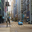

In [18]:
cv2_imshow(data[1])

In [19]:
X = np.array(data)

In [20]:
Y = np.array(labels)

In [21]:
X = X/255

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
num_of_classes = 2

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='sigmoid')
])

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(X, Y, validation_split=0.1, epochs=15)

Epoch 1/15
6/6 [==============================] - 0s 79ms/step - loss: 0.3098 - accuracy: 0.8655 - val_loss: 0.5804 - val_accuracy: 0.6000
Epoch 2/15
6/6 [==============================] - 0s 37ms/step - loss: 0.2955 - accuracy: 0.8655 - val_loss: 0.2776 - val_accuracy: 0.8500
Epoch 3/15
6/6 [==============================] - 0s 25ms/step - loss: 0.2881 - accuracy: 0.9064 - val_loss: 0.3946 - val_accuracy: 0.7000
Epoch 4/15
6/6 [==============================] - 0s 46ms/step - loss: 0.2765 - accuracy: 0.8889 - val_loss: 0.2812 - val_accuracy: 0.9000
Epoch 5/15
6/6 [==============================] - 0s 30ms/step - loss: 0.2681 - accuracy: 0.8889 - val_loss: 0.4004 - val_accuracy: 0.6500
Epoch 6/15
6/6 [==============================] - 0s 38ms/step - loss: 0.2448 - accuracy: 0.9298 - val_loss: 0.3179 - val_accuracy: 0.8000
Epoch 7/15
6/6 [==============================] - 0s 24ms/step - loss: 0.2420 - accuracy: 0.9298 - val_loss: 0.3648 - val_accuracy: 0.6500
Epoch 8/15
6/6 [===========

In [27]:
loss, accuracy = model.evaluate(X, Y)
print(accuracy)

6/6 [==============================] - 0s 4ms/step - loss: 0.1897 - accuracy: 0.9319
0.9319371581077576


In [40]:
trash_analysis('/content/drive/MyDrive/HackTJ/trashtrash.jpeg')

(1, 32, 32, 3)
1/1 [==============================] - 0s 114ms/step


True

In [31]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

In [33]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
pb_model = converter.convert()

with open("model.pb", 'wb') as f:
  f.write(tflite_model)

In [34]:
!pip install coremltools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.0 MB/s eta 0:00:00


In [35]:
import coremltools as ct

In [41]:
# Let's convert this to CoreML
mlmodel = ct.convert(model,
                     inputs=[ct.ImageType(scale=1/127, shape=[1, 32, 32, 3])])

Translating MIL ==> NeuralNetwork Ops: 100%|██████████| 12/12 [00:00<00:00, 160.95 ops/s]


In [43]:
mlmodel.save("trash_pred.mlmodel")